In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
sns.set_style("whitegrid")

### Vizualisation of species variation in pathways

1. From `concatenated.tsv`
2. Add `speciesKey` for `acceptedKey` (use GBIF services)
3. Group # of unique `speciesKey` by pathway (note: currently ' | ' separated)
4. Order pathways in main and sub categories [according to CBD](https://github.com/inbo/alien-species-checklist/issues/62#issuecomment-217879029)
5. Create bar chart for number of species.

In [3]:
concat_data = pd.read_csv("../../data/concatenated.tsv", sep="\t", dtype=object)

In [13]:
concat_data.columns

Index(['index', 'nameMatchValidation', 'taxonID', 'datasetName',
       'scientificName', 'verbatimScientificName', 'synonym', 'kingdom',
       'phylum', 'class', 'order', 'family', 'genus', 'specificEpithet',
       'infraspecificEpithet', 'vernacularNameEN', 'vernacularNameNL',
       'vernacularNameFR', 'verbatimInvasionStage', 'invasionStage',
       'invasionStageCertainty', 'BFIS', 'ISEIA', 'spatialDistribution',
       'invasiveness', 'verbatimIntroductionPathway', 'introductionPathway',
       'introductionMode', 'verbatimHabitat', 'habitat', 'verbatimNativeRange',
       'nativeRange', 'verbatimPresenceBE', 'verbatimPresenceFL',
       'verbatimPresenceWA', 'verbatimPresenceBR', 'verbatimPresenceBECoast',
       'verbatimPresenceBPNS', 'verbatimPresenceBEEZ', 'presenceBE',
       'presenceFL', 'presenceWA', 'presenceBR', 'presenceBECoast',
       'presenceBPNS', 'presenceBEEZ', 'firstObservationYearBE',
       'firstObservationYearFL', 'latestObservationYearBE', 'source',
   

### Get speciesKey for acceptedKeys

Using the Gbif services, we ask for the corresponding `speciesKey` based on the available `acceptedKey`:

In [14]:
import requests

In [15]:
def get_species_key(accepted_key):
    """get corresponding species key from acceptedKey-values"""
    r = requests.get("http://api.gbif.org/v1/species/" + str(accepted_key))
    try :
        key = str(r.json()["speciesKey"])
    except:
        key = None
    return key

In [16]:
concat_data["species_key"] = concat_data.apply(lambda x: get_species_key(x["gbifapi_acceptedKey"]), axis=1)

In [17]:
concat_data[["species_key", "gbifapi_acceptedKey"]].head()

,species_key,gbifapi_acceptedKey
0,4287131,4287131
1,2402129,2402129
2,2402168,2402168
3,2340989,2340989
4,5851603,5851603


Check for which these are different:

In [18]:
concat_data[concat_data["species_key"].astype(float) - concat_data["gbifapi_acceptedKey"].astype(float) > 0.0]

,index,nameMatchValidation,taxonID,datasetName,scientificName,verbatimScientificName,synonym,kingdom,phylum,class,...,gbifapi_usageKey,gbifapi_scientificName,gbifapi_canonicalName,gbifapi_status,gbifapi_rank,gbifapi_matchType,gbifapi_confidence,gbifapi_acceptedKey,gbifapi_acceptedScientificName,species_key
415,415,"ok, SYNONYM",NaN,plants,Pastinaca sativa L. subsp. urens (Req. ex Godr...,Pastinaca sativa L. subsp. urens (Req. ex Godr...,NaN,Plantae,NaN,NaN,...,7466434,Pastinaca sativa subsp. urens (Req. ex Godr.) ...,Pastinaca sativa urens,SYNONYM,SUBSPECIES,EXACT,100,7224157,Pastinaca sativa subsp. sativa,8262702
548,548,"ok, SYNONYM",NaN,plants,Carduus vivariensis Jord.,Carduus vivariensis Jord.,NaN,Plantae,NaN,NaN,...,4210773,Carduus vivariensis Jord.,Carduus vivariensis,SYNONYM,SPECIES,EXACT,100,6076849,Carduus nigrescens subsp. vivariensis (Jord.) ...,7984807
700,700,"ok, SYNONYM",NaN,plants,Pilosella bauhinii (Schult. ex Besser) Arv.-Touv.,Pilosella bauhinii (Schult. ex Besser) Arv.-Touv.,Hieracium bauhinii Schult. ex Besser,Plantae,NaN,NaN,...,6064433,"Pilosella bauhinii (Schult.) Arv.-Touv., 1881",Pilosella bauhinii,SYNONYM,SPECIES,EXACT,100,8111836,Pilosella piloselloides subsp. bauhini (Schult...,8288930
734,734,"ok, SYNONYM",NaN,plants,Senecio vernalis Waldst. et Kit.,Senecio vernalis Waldst. et Kit.,NaN,Plantae,NaN,NaN,...,6063730,Senecio vernalis Waldst. & Kit.,Senecio vernalis,SYNONYM,SPECIES,EXACT,99,4228701,Senecio leucanthemifolius subsp. vernalis (Wal...,7624085
1123,1123,"ok, SYNONYM",NaN,plants,Jovibarba sobolifera (Sims) Opiz,Jovibarba sobolifera (Sims) Opiz,NaN,Plantae,NaN,NaN,...,7334511,Jovibarba sobolifera (J. Sims) Opiz,Jovibarba sobolifera,SYNONYM,SPECIES,EXACT,100,7334391,Sempervivum globiferum subsp. globiferum,8091002
1176,1176,ok,NaN,plants,Cyperus longus L. subsp. badius (Desf.) Bonnie...,Cyperus longus L. subsp. badius (Desf.) Bonnie...,NaN,Plantae,NaN,NaN,...,7421129,Cyperus longus subsp. badius (Desf.) Bonnier &...,Cyperus longus badius,ACCEPTED,SUBSPECIES,EXACT,99,7421129,Cyperus longus subsp. badius (Desf.) Bonnier &...,8243603
1177,1177,ok,NaN,plants,Cyperus longus L. subsp. longus,Cyperus longus L. subsp. longus,NaN,Plantae,NaN,NaN,...,7070211,Cyperus longus subsp. longus,Cyperus longus longus,ACCEPTED,SUBSPECIES,EXACT,100,7070211,Cyperus longus subsp. longus,8243603
1178,1178,"ok, SYNONYM",NaN,plants,Cyperus longus L. subsp. tenuiflorus (Rottb.) ...,Cyperus longus L. subsp. tenuiflorus (Rottb.) ...,NaN,Plantae,NaN,NaN,...,2716588,Cyperus longus subsp. tenuiflorus (Rottb.) Kük.,Cyperus longus tenuiflorus,SYNONYM,SUBSPECIES,EXACT,98,7070211,Cyperus longus subsp. longus,8243603
1228,1228,ok,NaN,plants,Euphorbia esula L. subsp. tommasiniana (Bertol...,Euphorbia esula L. subsp. tommasiniana (Bertol...,NaN,Plantae,NaN,NaN,...,3064269,Euphorbia esula subsp. tommasiniana (Bertol.) ...,Euphorbia esula tommasiniana,ACCEPTED,SUBSPECIES,EXACT,99,3064269,Euphorbia esula subsp. tommasiniana (Bertol.) ...,8203538
1362,1362,ok,NaN,plants,Trifolium hybridum L. subsp. elegans (Savi) As...,Trifolium hybridum L. subsp. elegans (Savi) As...,NaN,Plantae,NaN,NaN,...,5359402,Trifolium hybridum subsp. elegans (Savi)Asch. ...,Trifolium hybridum elegans,ACCEPTED,SUBSPECIES,EXACT,99,5359402,Trifolium hybridum subsp. elegans (Savi)Asch. ...,6109535


### Split pathway based on |

In [19]:
concat_data.groupby(['introductionPathway']).first().head()

,index,nameMatchValidation,taxonID,datasetName,scientificName,verbatimScientificName,synonym,kingdom,phylum,class,...,gbifapi_usageKey,gbifapi_scientificName,gbifapi_canonicalName,gbifapi_status,gbifapi_rank,gbifapi_matchType,gbifapi_confidence,gbifapi_acceptedKey,gbifapi_acceptedScientificName,species_key
introductionPathway,,,,,,,,,,,,,,,,,,,,,
contaminant > contaminant nursery material,412,ok,NaN,plants,Oenanthe pimpinelloides L.,Oenanthe pimpinelloides L.,C. flexuosa With. subsp. debilis (D. Don) O.E....,Plantae,NaN,NaN,...,5371889,Oenanthe pimpinelloides L.,Oenanthe pimpinelloides,ACCEPTED,SPECIES,EXACT,99,5371889,Oenanthe pimpinelloides L.,5371889
contaminant > contaminant nursery material | stowaway,645,"ok, SYNONYM",NaN,plants,Gamochaeta pensylvanica (Willd.) Cabrera,Gamochaeta pensylvanica (Willd.) Cabrera,Gnaphalium pensylvanicum Willd.,Plantae,NaN,NaN,...,3103082,Gamochaeta pensylvanica (Willd.) Cabrera,Gamochaeta pensylvanica,SYNONYM,SPECIES,EXACT,100,5390730,Gnaphalium pensylvanicum Willd.,5390730
"contaminant > contaminant on animals (except parasites, species transported by host/vector)",6,ok,NaN,fishes,Carassius gibelio,Carassius gibelio,Aptenia cordifolia (L. f.) Schwantes,Animalia,NaN,NaN,...,2366634,"Carassius gibelio (Bloch, 1782)",Carassius gibelio,ACCEPTED,SPECIES,EXACT,100,2366634,"Carassius gibelio (Bloch, 1782)",2366634
"contaminant > contaminant on animals (except parasites, species transported by host/vector) | contaminant > transportation of habitat material (soil, vegetation,…)",317,"ok, SYNONYM",NaN,plants,Blitum virgatum L.,Blitum virgatum L.,Chenopodium foliosum Aschers.,Plantae,NaN,NaN,...,5383969,Blitum virgatum L.,Blitum virgatum,SYNONYM,SPECIES,EXACT,100,3083844,Chenopodium foliosum Asch.,3083844
"contaminant > contaminant on animals (except parasites, species transported by host/vector) | stowaway",1055,ok,NaN,plants,Polycarpon tetraphyllum (L.) L.,Polycarpon tetraphyllum (L.) L.,NaN,Plantae,NaN,NaN,...,3085381,Polycarpon tetraphyllum (L.) L.,Polycarpon tetraphyllum,ACCEPTED,SPECIES,EXACT,100,3085381,Polycarpon tetraphyllum (L.) L.,3085381


In [20]:
def split_double_field_entry(df, keyword="|", column='introductionPathway'):
    """split on keyword in column for an enumeration and create extra record
    """
    s = df[column].str.lower().str.split(keyword).apply(pd.Series, 1).stack()
    s.index = s.index.droplevel(-1)
    s.name = column
    del df[column]
    return df.join(s)

In [21]:
pathway_uitvouwen = split_double_field_entry(concat_data, keyword="|", column='introductionPathway')

In [22]:
pathway_uitvouwen["introductionPathway"] = pathway_uitvouwen["introductionPathway"].str.strip()

In [23]:
unique_species = pathway_uitvouwen.groupby("introductionPathway").species_key.nunique()

In [24]:
unique_species = pd.DataFrame(unique_species).reset_index()

In [25]:
unique_species["category"] = unique_species["introductionPathway"].str.split(">").str.get(0).str.strip()
unique_species["subcategory"] = unique_species["introductionPathway"].str.split(">").str.get(1).str.strip()
unique_species = unique_species.rename(columns={"species_key": "count_species_key"})

In [27]:
unique_species.to_csv("fig_base.tsv", sep="\t")

In [9]:
unique_species = pd.read_csv("fig_base.tsv", sep="\t")

In [10]:
unique_species = unique_species.drop("Unnamed: 0", axis=1)

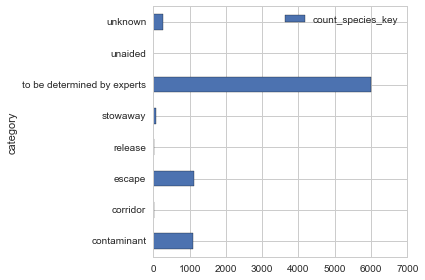

In [11]:
species_category = unique_species.groupby("category").agg({"count_species_key":sum})
species_category.plot(kind="barh", logx=False)
plt.tight_layout()
plt.savefig("category_count.png")

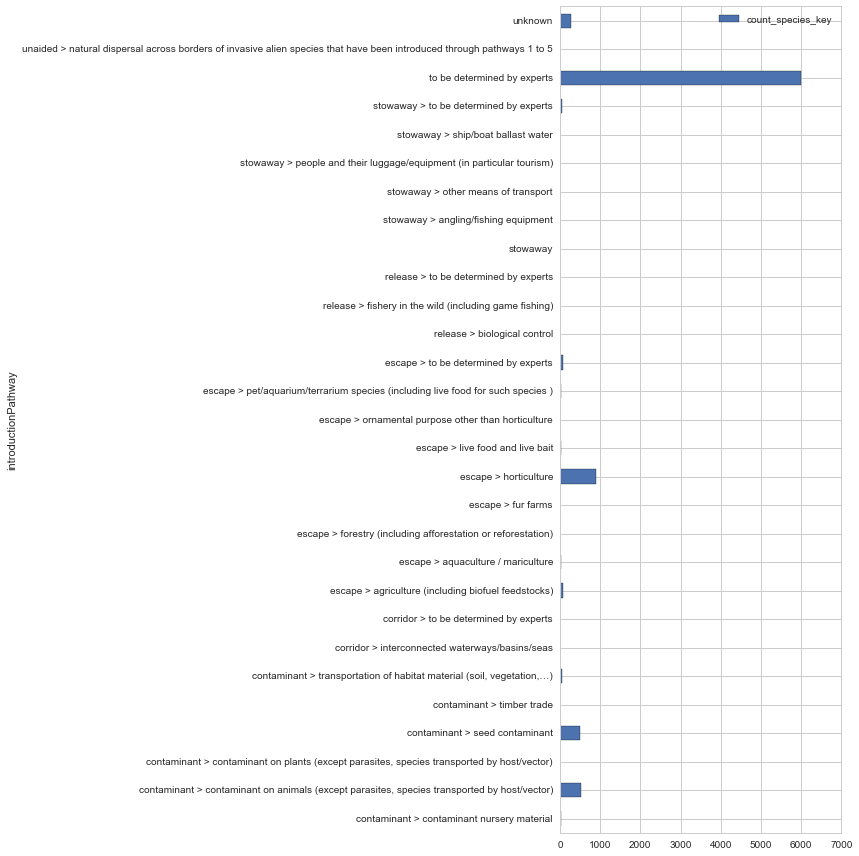

In [12]:
unique_species[["count_species_key", "introductionPathway"]].set_index("introductionPathway").plot(kind="barh", figsize=(12, 12))
plt.tight_layout()
plt.savefig("subcategory_count.png")


In [13]:
unique_species['subcategory'] = unique_species['subcategory'].astype(str)
unique_species['category'] = unique_species['category'].astype(object)
unique_species["subcategory"] = unique_species["subcategory"].replace("nan", "unknown")

In [16]:
unique_species

,introductionPathway,count_species_key,category,subcategory
0,contaminant > contaminant nursery material,16,contaminant,contaminant nursery material
1,contaminant > contaminant on animals (except p...,517,contaminant,"contaminant on animals (except parasites, spec..."
2,contaminant > contaminant on plants (except pa...,3,contaminant,"contaminant on plants (except parasites, speci..."
3,contaminant > seed contaminant,501,contaminant,seed contaminant
4,contaminant > timber trade,7,contaminant,timber trade
5,contaminant > transportation of habitat materi...,51,contaminant,"transportation of habitat material (soil, vege..."
6,corridor > interconnected waterways/basins/seas,10,corridor,interconnected waterways/basins/seas
7,corridor > to be determined by experts,9,corridor,to be determined by experts
8,escape > agriculture (including biofuel feedst...,73,escape,agriculture (including biofuel feedstocks)
9,escape > aquaculture / mariculture,18,escape,aquaculture / mariculture


TypeError: 'NoneType' object is not subscriptable

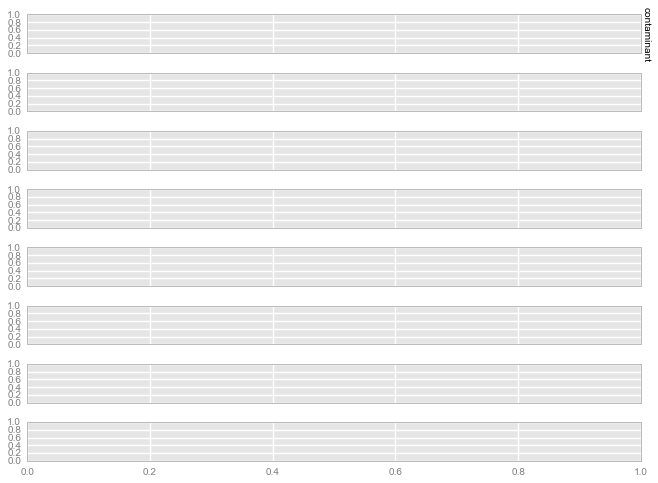

In [15]:
ggplot(aes(x='subcategory', weight='count_species_key'), data=unique_species) +\
        geom_bar() + facet_grid("category")

In [7]:
unique_species

,Unnamed: 0,introductionPathway,count_species_key,category,subcategory
0,0,contaminant > contaminant nursery material,16,contaminant,contaminant nursery material
1,1,contaminant > contaminant on animals (except p...,517,contaminant,"contaminant on animals (except parasites, spec..."
2,2,contaminant > contaminant on plants (except pa...,3,contaminant,"contaminant on plants (except parasites, speci..."
3,3,contaminant > seed contaminant,501,contaminant,seed contaminant
4,4,contaminant > timber trade,7,contaminant,timber trade
5,5,contaminant > transportation of habitat materi...,51,contaminant,"transportation of habitat material (soil, vege..."
6,6,corridor > interconnected waterways/basins/seas,10,corridor,interconnected waterways/basins/seas
7,7,corridor > to be determined by experts,9,corridor,to be determined by experts
8,8,escape > agriculture (including biofuel feedst...,73,escape,agriculture (including biofuel feedstocks)
9,9,escape > aquaculture / mariculture,18,escape,aquaculture / mariculture


In [ ]:
species_category = unique_species.groupby("category").agg({"count_species_key":sum})
species_category.plot(kind="barh", logx=False)
plt.savefig("category_count.png")

In [ ]:
viz_prep.plot(kind="barh", figsize=(12,12))

In [ ]:
viz_prep.head()